<a href="https://colab.research.google.com/github/LoveMeWithoutAll/keraspp/blob/feature%2Fch03/study/DNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
Nin = 784
Nh_l = [100, 50]
number_of_class = 10
Nout = number_of_class

In [2]:
from keras import layers, models

class DNN(models.Sequential):
  def __init__(self, Nin, Nh, Nout):
    super().__init__()
    self.add(layers.Dense(Nh_l[0], activation='relu', input_shape=(Nin,), name='Hidden-1'))
    self.add(layers.Dense(Nh_l[1], activation='relu', name='Hidden-2'))
    self.add(layers.Dense(Nout, activation='softmax'))
    self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


In [0]:
from keras import datasets
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
L, W, H = X_train.shape
X_train = X_train.reshape(-1, W * H)
X_test = X_test.reshape(-1, W * H)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
model = DNN(Nin=Nin, Nh=Nh_l, Nout=Nout)
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.2)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/10





48000/48000 [==============================] - 3s 60us/step - loss: 0.3911 - acc: 0.8918 - val_loss: 0.1928 - val_acc: 0.9431
Epoch 2/10
48000/48000 [==============================] - 2s 49us/step - loss: 0.1641 - acc: 0.9514 - val_loss: 0.1440 - val_acc: 0.9583
Epoch 3/10
48000/48000 [==============================] - 2s 49us/step - loss: 0.1197 - acc: 0.9650 - val_loss: 0.1219 - val_acc: 0.9638
Epoch 4/10
48000/48000 [==============================] - 2s 50us/step - loss: 0.0926 - acc: 0.9724 - val_loss: 0.1061 - val_acc: 0.9675
Epoch 5/10
48000/48000 [==============================] - 2s 52us/step - loss: 0.0751 - acc: 0.9775 - val_loss: 0.1041 - val_acc: 0.9668
Epoch 6/10
48000/48000 [==============================] - 2s 51us/step - loss: 0.0612 - acc: 0.9817 - val_loss: 0.1019 - val_acc: 0.9694
Epoch 7/10
48000/4800

In [5]:
performance_test = model.evaluate(X_test, y_test, batch_size=100)
print('Test Loss and Accuracy ->', performance_test)

10000/10000 [==============================] - 0s 16us/step
Test Loss and Accuracy -> [0.09010233482476906, 0.9753000062704086]


In [0]:
import matplotlib.pyplot as plt

def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()

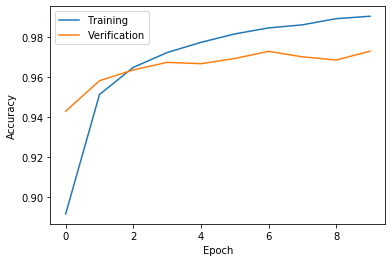

In [9]:
plot_acc(history)
plt.show()

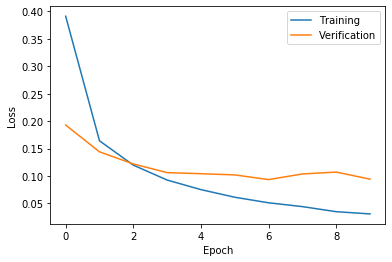

In [10]:
plot_loss(history)
plt.show()